In [1]:
!pip install dowhy
!pip install causalinference
!pip install causalnex

  Obtaining dependency information for dowhy from https://files.pythonhosted.org/packages/8f/c1/3700527aeaf38b80a6ec03fcc23157a1b6fbae4150f4577f9498b1f5e731/dowhy-0.11-py3-none-any.whl.metadata
  Obtaining dependency information for causal-learn>=0.1.3.0 from https://files.pythonhosted.org/packages/b0/05/0ef0df8d3d9642c61c78e783167914526c5bdf528f23ca3b64807f029fd0/causal_learn-0.1.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for cvxpy<2.0.0,>=1.2.2 from https://files.pythonhosted.org/packages/7d/df/c3bc1bdd99d09a446b4e56cfe551c7f1f2bbe116b94bddc2918aacdb7af5/cvxpy-1.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/dd/d1/a091ae0a5fb583147184592011952aeb7827cde73a0fe7b7e95d84d752fd/osqp-0.6.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for clarabel>=0.5.0

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import dowhy
from dowhy import CausalModel
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-economics-of-happiness-simple-data-20152019/TEH_World_Happiness_2019_Imputed.csv
/kaggle/input/the-economics-of-happiness-simple-data-20152019/TEH_World_Happiness_2015_2018_Imputed.csv
/kaggle/input/the-economics-of-happiness-simple-data-20152019/TEH_World_Happiness_2015_2019_Imputed.csv


In [3]:
# load data
df = pd.read_csv("/kaggle/input/the-economics-of-happiness-simple-data-20152019/TEH_World_Happiness_2015_2019_Imputed.csv")
df.head()


,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


Establishing causality between variables in a dataset, such as corruption, Freedom, and the happiness rank, requires careful analysis and adherence to principles of causal inference. While correlation between variables can be observed easily, determining causation is more complex. Here are steps to follow for exploring causality:

### 1. **Understand  Data:**
   - Familiarizing with the dataset, including the variables, their definitions, and the context of the data collection.
   - Identify potential confounding variables that could influence both the independent and dependent variables.

### 2. **Correlation Analysis:**
   - Begin by calculating correlation coefficients between each independent variable (etc:corruption, development) and the dependent variable (happiness index).
   - Understand the strength and direction of these correlations.

### 3. **Data Visualization:**
   - Create visualizations such as scatter plots or heatmaps to visually assess the relationships between variables.
   - Look for patterns or trends that may suggest a causal relationship.

### 4. **Control for Confounding Variables:**
   - If confounding variables are identified, control for them in your analysis. This can be done through statistical methods like regression analysis, or by stratifying the data based on these variables.

### 5. **Temporal Analysis:**
   - Examine the temporal order of events. If possible, ensure that the cause precedes the effect in time. This doesn’t prove causation, but it's an important criterion.

### 6. **Randomized Control Trials (RCTs):**
   - If feasible, design experiments that randomize the exposure to the independent variables. This is considered the gold standard for establishing causation, but it may not always be possible or ethical.


### 7. **Expert Consultation:**
   - Seek input from domain experts who can provide insights into the causal relationships based on their knowledge of the subject matter.

### 8. **Robustness Checks:**
   - Perform robustness checks by using alternative models or statistical methods to see if the results are consistent across different approaches.

### 9. **Causal Inference Frameworks:**
   - Using causal inference frameworks like the Rubin Causal Model or potential outcomes framework to guide your analysis.

Remember that establishing causality is a challenging task, and correlation does not imply causation. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness rank   782 non-null    int64  
 2   Happiness Score  782 non-null    float64
 3   GDP per capita   777 non-null    float64
 4   Social support   777 non-null    float64
 5   Healthy life     777 non-null    float64
 6   Freedom          777 non-null    float64
 7   Generosity       777 non-null    float64
 8   Corruption       775 non-null    float64
 9   Year             782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [5]:
#describing the dataset statistically
df.describe()


,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
count,782.000000,782.000000,777.000000,777.000000,777.000000,777.000000,777.000000,775.000000,782.000000
mean,78.698210,5.379018,0.921942,1.085332,0.616356,0.413736,0.219982,0.126407,2016.993606
std,45.182384,1.127456,0.401937,0.318999,0.244177,0.149757,0.121445,0.105646,1.417364
min,1.000000,2.693000,0.015300,0.104190,0.005565,0.005890,0.001990,0.001000,2015.000000
25%,40.000000,4.509750,0.619000,0.871190,0.443000,0.312000,0.133520,0.055000,2016.000000
50%,79.000000,5.322000,0.985000,1.125000,0.649547,0.432453,0.202000,0.092000,2017.000000
75%,118.000000,6.189500,1.238000,1.330000,0.809158,0.531220,0.279920,0.156352,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


In [6]:
# Missing values
df.isnull().sum()


Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     5
Social support     5
Healthy life       5
Freedom            5
Generosity         5
Corruption         7
Year               0
dtype: int64

In [7]:
#unique countries present in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values in {column}: {df[column].unique()}")


Unique values in Country: ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'P

In [8]:
# Checking for unique number of countries present in the dataset
unique_countries_count = df['Country'].nunique()
print(f"Number of unique countries: {unique_countries_count}")


Number of unique countries: 170


In [9]:
#Let's drop the 'Country' and 'Happiness rank' columns from out dataset, 
#Since we don't be needing the country column and 
#we already have 'Happiness Score' which we will be considering as output variable
df = df.drop(['Country'], axis=1)
df = df.drop(['Happiness rank'], axis=1)

print(df.head())


   Happiness Score  GDP per capita  Social support  Healthy life  Freedom  \
0            7.587         1.39651         1.34951       0.94143  0.66557   
1            7.561         1.30232         1.40223       0.94784  0.62877   
2            7.527         1.32548         1.36058       0.87464  0.64938   
3            7.522         1.45900         1.33095       0.88521  0.66973   
4            7.427         1.32629         1.32261       0.90563  0.63297   

   Generosity  Corruption  Year  
0     0.29678     0.41978  2015  
1     0.43630     0.14145  2015  
2     0.34139     0.48357  2015  
3     0.34699     0.36503  2015  
4     0.45811     0.32957  2015  


                 Happiness Score  GDP per capita  Social support  \
Happiness Score         1.000000        0.793925        0.637676   
GDP per capita          0.793925        1.000000        0.566400   
Social support          0.637676        0.566400        1.000000   
Healthy life            0.744793        0.779604        0.561333   
Freedom                 0.544895        0.352347        0.424474   
Generosity              0.136706       -0.002124       -0.038168   
Corruption              0.400351        0.323365        0.119652   
Year                    0.007065        0.020230        0.382121   

                 Healthy life   Freedom  Generosity  Corruption      Year  
Happiness Score      0.744793  0.544895    0.136706    0.400351  0.007065  
GDP per capita       0.779604  0.352347   -0.002124    0.323365  0.020230  
Social support       0.561333  0.424474   -0.038168    0.119652  0.382121  
Healthy life         1.000000  0.330416    0.018854    0.255595  0.133432  
Freedom

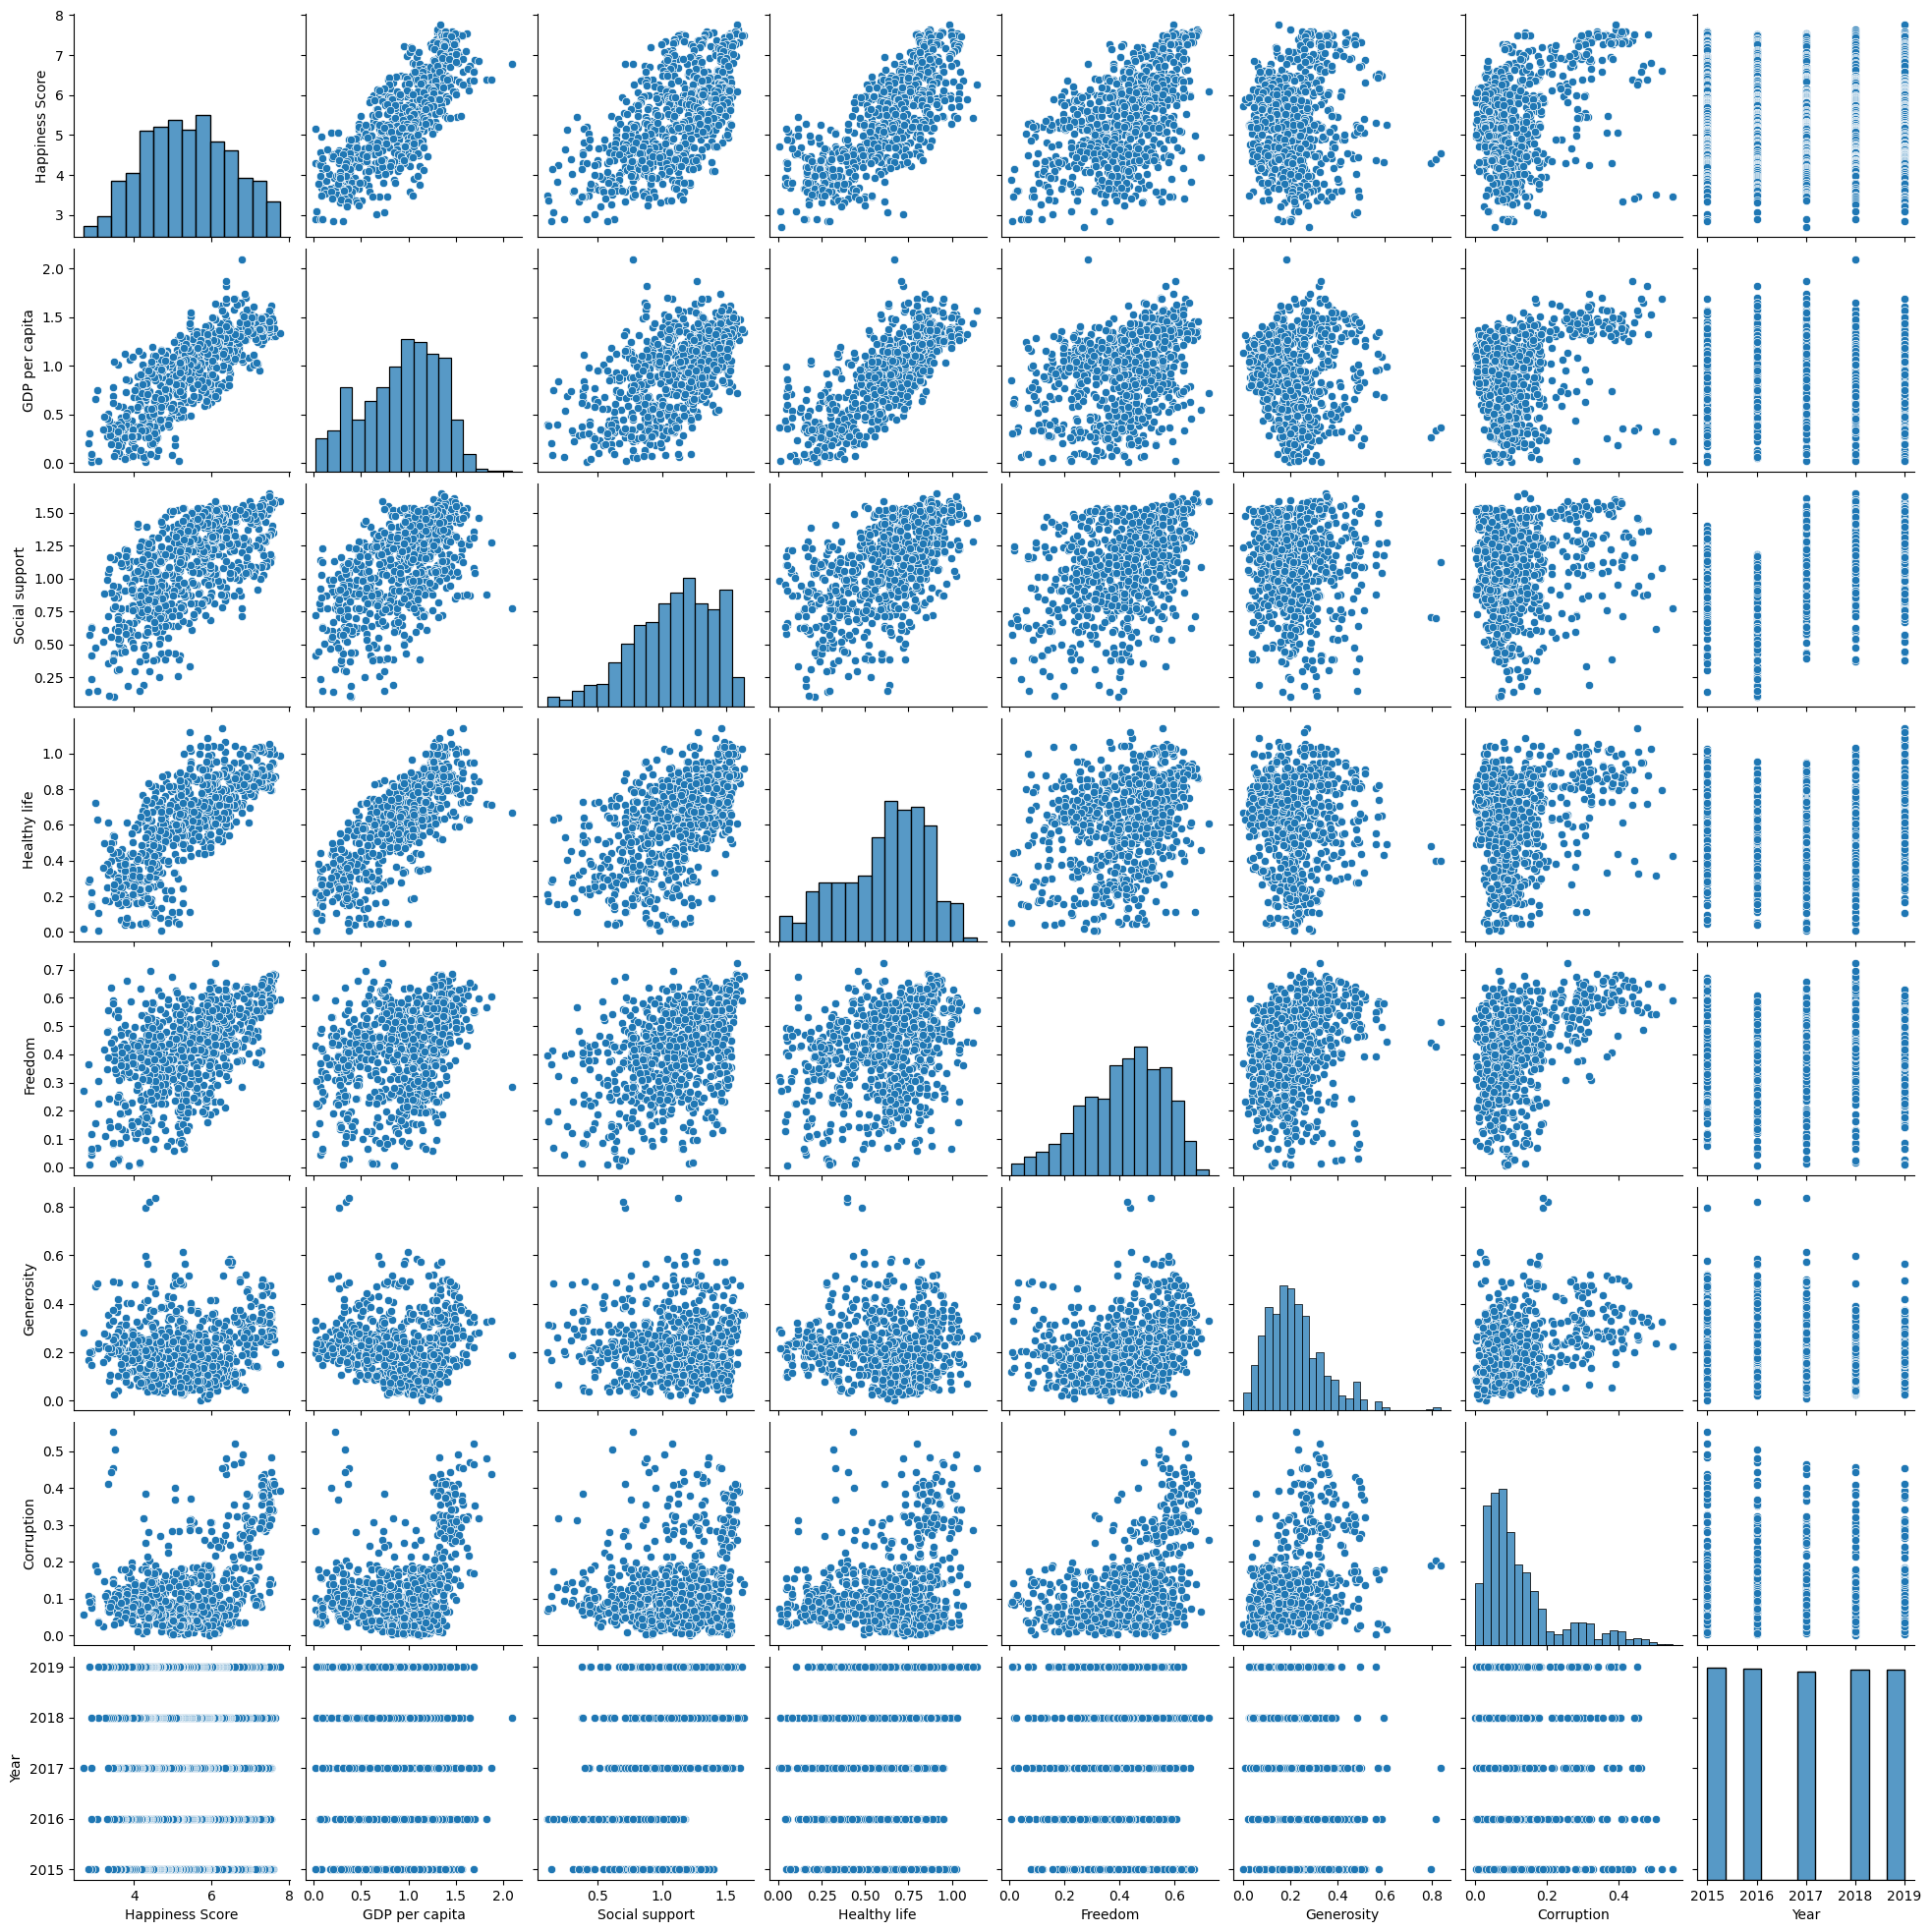

In [10]:
#Pearson correlation coefficients
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

#Visualizing relationships using pair plots or heatmaps
sns.pairplot(df)
plt.show()


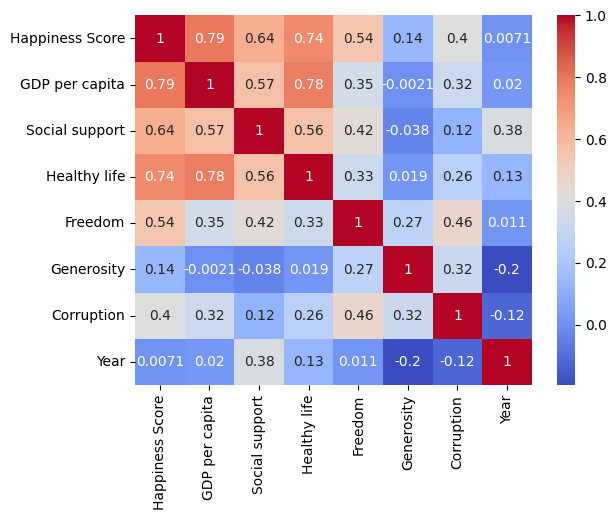

In [11]:
#Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

The correlation coefficients in the matrix represent the strength and direction of linear relationships between pairs of variables. Here's an interpretation of the correlation coefficients:


### **Happiness Score vs. Other Variables:**

GDP per capita (0.793925): There is a strong positive correlation between GDP per capita and Happiness Score. As the GDP per capita increases, the Happiness Score tends to increase as well.


Social Support (0.637676): There is a positive correlation between Social Support and Happiness Score, indicating that countries with higher social support tend to have higher happiness scores.

Healthy Life (0.744793): There is a strong positive correlation between Healthy Life and Happiness Score, suggesting that countries with better health conditions tend to have higher happiness scores.

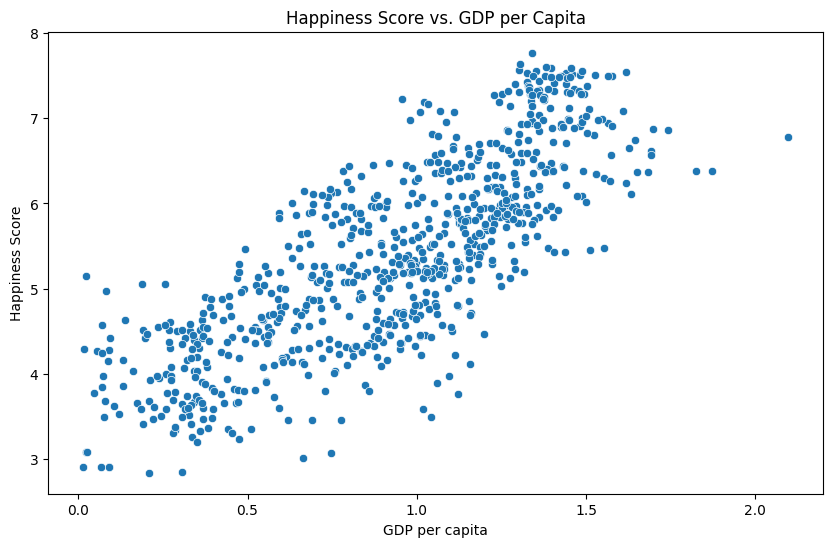

In [12]:
#Lets see a scatter plot between Happiness Score and GDP per Capita, 
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Happiness Score', data=df)
plt.title('Happiness Score vs. GDP per Capita')
plt.show()


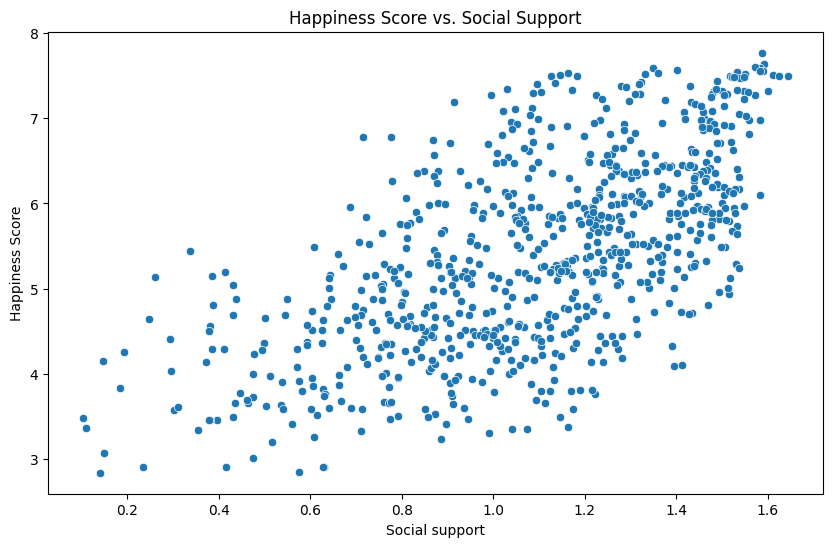

In [13]:
#Lets see a scatter plot between Happiness Score and Social Support, 
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness Score', data=df)
plt.title('Happiness Score vs. Social Support')
plt.show()


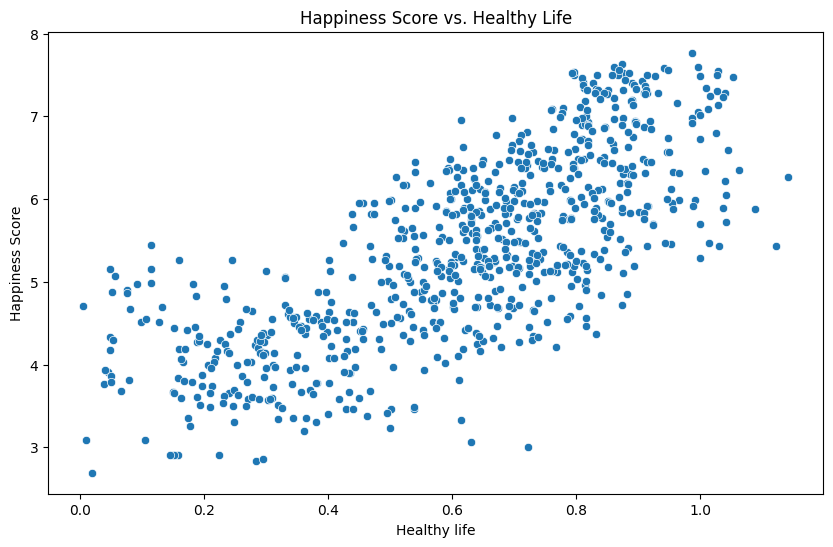

In [14]:
#Lets see a scatter plot between Happiness Score and Healthy Life, 
#This will help us understand their relatioship better.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Healthy life', y='Happiness Score', data=df)
plt.title('Happiness Score vs. Healthy Life')
plt.show()


In [15]:
#Dropping the missing value rows
df_cleaned = df.dropna()

X = df_cleaned[['GDP per capita', 'Social support', 'Healthy life', 'Freedom']]
X = sm.add_constant(X)
y = df_cleaned['Happiness Score']



To control for confounding variables, you can use regression analysis.

In [16]:
#Linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     567.1
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          1.73e-224
Time:                        01:45:40   Log-Likelihood:                -627.68
No. Observations:                 751   AIC:                             1265.
Df Residuals:                     746   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2353      0.080     28.

The Ordinary Least Squares (OLS) regression results indicate that the model is statistically significant in explaining the variation in the Happiness Score. The R-squared value of 0.753 suggests that approximately 75.3% of the variability in Happiness Score can be explained by the included independent variables (GDP per capita, Social support, Healthy life, and Freedom).

The adjusted R-squared, accounting for the number of predictors, remains high at 0.751. The individual coefficients reveal the estimated impact of each independent variable on Happiness Score, with all variables—GDP per capita, Social support, Healthy life, and Freedom—demonstrating statistically significant effects. For instance, a one-unit increase in GDP per capita is associated with a 1.2271-unit rise in Happiness Score, while similar interpretations apply to the other variables. 

The overall F-statistic is highly significant (p-value < 0.001), indicating that the model is collectively significant. However, considerations should be made for the normality of residuals, as suggested by the Omnibus and Jarque-Bera tests, and potential multicollinearity concerns indicated by the condition number. 

The Durbin-Watson statistic suggests no apparent autocorrelation in the residuals. In summary, the model effectively captures a substantial portion of the variability in Happiness Score, providing valuable insights into the influence of the included factors.

Controlling for confounding variables is a crucial aspect of statistical analysis, aimed at mitigating the impact of factors that might distort the true relationship between independent and dependent variables. In the presented study, Ordinary Least Squares (OLS) regression analysis serves as the primary tool for this purpose. By simultaneously considering GDP per capita, Social support, Healthy life, and Freedom in the model, the analysis aims to disentangle their individual effects on Happiness Score while keeping the influence of other variables constant. The resulting coefficients provide insights into the unique contribution of each factor, offering a clearer understanding of their respective impacts on overall happiness. Alternatively, stratifying the data based on confounding variables provides a complementary approach, allowing for comparisons across subsets with similar characteristics. Overall, these methods enhance the robustness of the analysis, ensuring a more accurate interpretation of the relationships among the studied variables.

**Temporal Analysis**
Let see the effect of time on Happiness Score, is it increasing with time or is it decreasing?


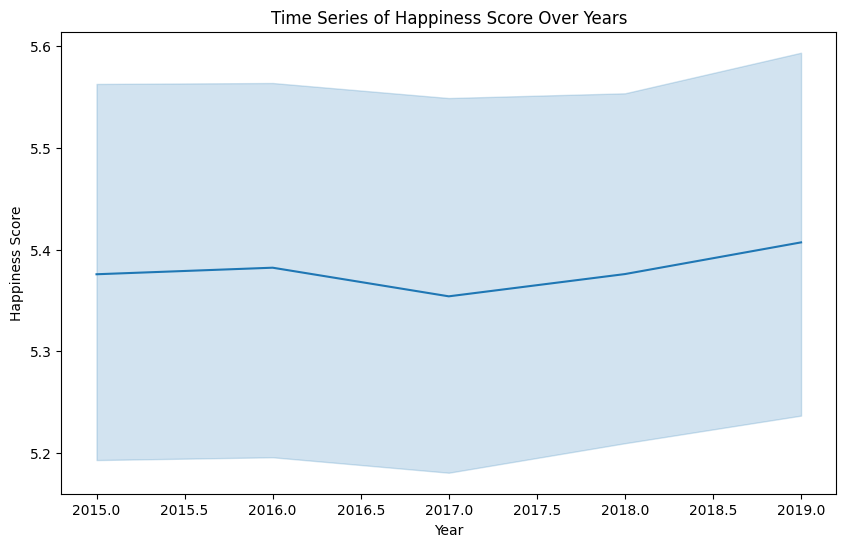

In [17]:
df_sorted = df.sort_values(by='Year')


# Time series plot for Happiness Score
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Happiness Score', data=df_sorted)
plt.title('Time Series of Happiness Score Over Years')
plt.show()


From above we can suggest that their in no constant increase or decrease in happiness score wrt time. Their are ups and downs. So we can state that happiness score doesn't depend on time. 

In [18]:
df_cleaned2 = df_cleaned
data = df_cleaned2
# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# Fit a linear regression model
model = LinearRegression()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
model.fit(train_data[features], train_data['Happiness Score'])
test_predictions = model.predict(test_data[features])
# Model performance evaluation
mse = mean_squared_error(test_data['Happiness Score'], test_predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.28363890686388893


In [19]:
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
print(train_data[features].head())


     GDP per capita  Social support  Healthy life  Freedom
136         0.75778         0.86040       0.16683  0.10384
44          1.16891         1.26999       0.78902  0.31751
70          1.00761         0.98521       0.70950  0.56066
699         0.49300         1.09800       0.71800  0.38900
214         1.24585         1.04685       0.69058  0.45190


In [20]:
print(train_data[features].shape)


(600, 4)


**APPROACH**

1. **Linear Regression Model:**
    Start by fitting a linear regression model to predict the 'Happiness Score' based on the features 'GDP per capita,' 'Social support,' 'Healthy life,' and 'Freedom.' This is a supervised machine learning model that learns the relationship between the selected features and the target variable.

2. **Model Evaluation (Mean Squared Error):**
    After training the linear regression model, we assess its performance on the test set using the Mean Squared Error (MSE). The MSE measures the average squared difference between the predicted 'Happiness Score' and the actual 'Happiness Score' on the test set.

3. **Causal Inference Using DoWhy:**
    The main part of our code is a loop that performs causal inference for each feature individually. The loop iterates over the features 'GDP per capita,' 'Social support,' 'Healthy life,' and 'Freedom.'

   - **For Each Feature:**
     - **Create a Causal Model:**
       - A causal model is created using the CausalModel class from DoWhy. This model includes the selected feature as the treatment variable, 'Happiness Score' as the outcome variable, and the remaining features as common causes. The goal is to estimate the causal effect of each feature on the 'Happiness Score.'

     - **Identify Causal Effect:**
       - The `identify_effect` method is used to identify the causal effect. DoWhy attempts to find a causal graph that represents the relationships between variables and identifies the effect that can be estimated from the available data.

     - **Estimate Causal Effect Using Linear Regression:**
       - The `estimate_effect` method is then employed to estimate the causal effect using linear regression as the chosen estimation method (method_name="backdoor.linear_regression").

     - **Print Estimated Average Treatment Effect:**
       - Finally, the estimated average treatment effect for each feature is printed.

In summary, the below code demonstrates a causal inference analysis for each individual feature to estimate its impact on the 'Happiness Score' while controlling for the effects of other features. The DoWhy library is used to handle the causal modeling, identification, and estimation steps, providing a systematic approach to causal inference. Keep in mind that causal inference results are based on assumptions, and the validity of the estimated effects depends on the correctness of these assumptions.

In [21]:


data = df_cleaned2.copy()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model for the outcome variable ('Happiness Score')
model = LinearRegression()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']

model.fit(train_data[features], train_data['Happiness Score'])

# Predict the outcome variable on the test set
test_data['Predicted Happiness Score'] = model.predict(test_data[features])

# Assess the performance of the linear regression model
mse = mean_squared_error(test_data['Happiness Score'], test_data['Predicted Happiness Score'])
print(f'Mean Squared Error (MSE) of the model: {mse}')

# Perform causal inference using DoWhy for each feature
for feature in features:
    print(f"\nCausal Inference for {feature} as the treatment variable:")
    
    # Create a causal model for the specific feature
    causal_model = CausalModel(
        data=train_data,
        treatment=feature,
        outcome='Happiness Score',
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Print the estimated average treatment effect
    print(f'Estimated Average Treatment Effect: {causal_estimate.value}')


Mean Squared Error (MSE) of the model: 0.28363890686388893

Causal Inference for GDP per capita as the treatment variable:
Estimated Average Treatment Effect: 1.1959333696972827

Causal Inference for Social support as the treatment variable:
Estimated Average Treatment Effect: 0.5861674659853104

Causal Inference for Healthy life as the treatment variable:
Estimated Average Treatment Effect: 1.0261017566278134

Causal Inference for Freedom as the treatment variable:
Estimated Average Treatment Effect: 1.987639696584817


The results you obtained represent the performance of the linear regression model and the estimated average treatment effects for each treatment variable in the context of your causal inference. Let's break down the key findings:

**Mean Squared Error (MSE) of the Model: 0.2836**

The MSE is a measure of the average squared difference between the predicted values and the actual values. In your case, it indicates how well the linear regression model (using the specified features) predicts the 'Happiness Score' on the test set. A lower MSE indicates better predictive performance.

**Causal Inference for GDP per capita as the Treatment Variable:**
- **Estimated Average Treatment Effect: 1.1959**
  - This result suggests that, on average, a unit increase in 'GDP per capita' is associated with a 1.1959 increase in the 'Happiness Score.' This is the estimated causal effect of changing 'GDP per capita' on happiness.

**Causal Inference for Social Support as the Treatment Variable:**
- **Estimated Average Treatment Effect: 0.5862**
  - This result suggests that, on average, a unit increase in 'Social Support' is associated with a 0.5862 increase in the 'Happiness Score.' This indicates a potentially moderate influence of 'Social Support' on happiness.

**Causal Inference for Healthy Life as the Treatment Variable:**
- **Estimated Average Treatment Effect: 1.0261**
  - Similarly, this result suggests that a unit increase in 'Healthy Life' is associated with a 1.0261 increase in the 'Happiness Score.' This indicates a potentially strong positive effect of 'Healthy Life' on happiness.

**Causal Inference for Freedom as the Treatment Variable:**
- **Estimated Average Treatment Effect: 1.9876**
  - This result indicates that a unit increase in 'Freedom' is associated with a substantial increase of 1.9876 in the 'Happiness Score.' This suggests a strong positive effect of 'Freedom' on happiness.

In summary, these estimated treatment effects provide insights into the average impact of changes in each respective feature on the 'Happiness Score' based on the causal inference model. The larger the estimated effect, the stronger the perceived influence of that feature on happiness. Keep in mind that these are average effects, and individual responses may vary.

**Matching or Propensity Score Matching:**

Matching methods or propensity score matching aim to create comparable treatment and control groups by matching individuals based on observed characteristics.
This helps control for confounding variables.

The below code is performing causal inference using propensity score matching on a dataset to estimate the average treatment effect for each feature. Here's a breakdown of the key steps:

1. **Propensity Score Estimation (Logistic Regression):**
    A logistic regression model is fitted on the training data to predict the propensity scores for the treatment variable (`'Treatment'`). Propensity scores represent the likelihood of receiving the treatment based on the observed covariates (features).

2. **Propensity Score Scaling:**
    The features are scaled using `StandardScaler`, and the propensity scores are reshaped for further processing.

3. **Nearest Neighbors Matching:**
    Nearest neighbors are identified in the scaled feature space to create matches between treated and control units.
   

4. **Matched Dataset Creation:**
    The matched dataset (`matched_data`) is created by selecting the rows from the training data based on the indices of the nearest neighbors.

5. **Causal Inference using DoWhy:**
    Causal inference is performed for each feature using the DoWhy library.
    A `CausalModel` is created using the matched dataset, with the treatment variable, outcome variable, and common causes specified.
    The causal effect is identified, and linear regression is used to estimate the causal effect (`backdoor.linear_regression` method).
    The estimated average treatment effect for each feature is printed.

In summary, this code demonstrates a workflow for estimating the causal effects of features on the outcome variable (`'Happiness Score'`) using propensity score matching and the DoWhy library. Propensity scores are used to create matched pairs of treated and control units, and causal inference is then performed on the matched dataset to estimate the average treatment effect for each feature.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Use LinearRegression for continuous outcome
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from dowhy import CausalModel

# Assume you have a cleaned dataset named 'df_cleaned2'
data = df_cleaned2.copy()

# Specify the columns in your dataset
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
treatment_variable = 'Happiness Score'
outcome_variable = 'Happiness Score'

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Fit a linear regression model for the treatment variable
linear_model = LinearRegression()
linear_model.fit(train_data[features], train_data[treatment_variable])

# Predict propensity scores on the training set
train_data['Propensity Score'] = linear_model.predict(train_data[features])

# Apply propensity score matching
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[features])
scaled_treatment = np.array(train_data['Propensity Score']).reshape(-1, 1)

# Use nearest neighbors to find matches with a larger number of neighbors (e.g., 5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(np.hstack([scaled_features, scaled_treatment]))

# Find nearest neighbors in the test set
test_data['Propensity Score'] = linear_model.predict(test_data[features])
scaled_test_features = scaler.transform(test_data[features])
scaled_test_treatment = np.array(test_data['Propensity Score']).reshape(-1, 1)

distances, indices = neighbors.kneighbors(np.hstack([scaled_test_features, scaled_test_treatment]))

# Create matched dataset
matched_data = train_data.iloc[indices.flatten()]

# Perform causal inference using DoWhy for each feature
for feature in features:
    # Perform causal inference using the matched data
    causal_model_matched = CausalModel(
        data=matched_data,
        treatment=feature,
        outcome=outcome_variable,
        common_causes=[col for col in features if col != feature]
    )

    # Identify the causal effect
    identified_estimand = causal_model_matched.identify_effect()

    # Estimate the causal effect using linear regression
    causal_estimate = causal_model_matched.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Print the estimated average treatment effect
    print(f'Estimated Average Treatment Effect with Propensity Score Matching for {feature}: {causal_estimate.value}')


Estimated Average Treatment Effect with Propensity Score Matching for GDP per capita: 1.2735644992607105
Estimated Average Treatment Effect with Propensity Score Matching for Social support: 0.5605238611789147
Estimated Average Treatment Effect with Propensity Score Matching for Healthy life: 1.252557561234605
Estimated Average Treatment Effect with Propensity Score Matching for Freedom: 1.7513407887086077


The "Estimated Average Treatment Effect (ATE) with Propensity Score Matching" values you provided indicate the average causal effect of the respective features (GDP per capita, Social support, Healthy life, and Freedom) on the outcome variable (Happiness Score) as estimated using propensity score matching.

Here's what each value represents:

1. **Estimated Average Treatment Effect with Propensity Score Matching for GDP per capita: 1.2736**
   - On average, increasing GDP per capita by one unit is associated with an increase of approximately 1.2736 units in the Happiness Score, according to the estimated causal effect obtained through propensity score matching.

2. **Estimated Average Treatment Effect with Propensity Score Matching for Social support: 0.5605**
   - On average, increasing Social support by one unit is associated with an increase of approximately 0.5605 units in the Happiness Score.

3. **Estimated Average Treatment Effect with Propensity Score Matching for Healthy life: 1.2526**
   - On average, increasing Healthy life by one unit is associated with an increase of approximately 1.2526 units in the Happiness Score.

4. **Estimated Average Treatment Effect with Propensity Score Matching for Freedom: 1.7513**
   - On average, increasing Freedom by one unit is associated with an increase of approximately 1.7513 units in the Happiness Score.

In essence, these values provide an estimate of the average change in the outcome variable (Happiness Score) when the specified feature is increased by one unit, considering the matched control and treatment groups based on propensity scores. These estimates are derived from the propensity score matching method and are used to infer causal relationships from observational data.

**Interpreting the Results:**

1. **Consistent Positive Effects:**
   - In both methods, Social support, Healthy life, and Freedom consistently show substantial positive effects on Happiness Score.

2. **GDP per Capita Influence:**
   - GDP per capita has a positive effect, but the magnitude is smaller compared to the other features.

3. **Methodological Consistency:**
   - While there are differences in the estimated magnitudes between the two methods, the general trend is similar.

**Causal Relationship:**

The results indicate associations between the specified features and Happiness Score. However, establishing a true causal relationship requires careful consideration of underlying assumptions, potential confounders, and study design. Causal inference methods help control for confounding factors, but causality cannot be definitively concluded without additional evidence or experimental design.

**Key Takeaways:**
- These results suggest that Social support, Healthy life, and Freedom may have a stronger positive influence on Happiness Score, according to the specific context and assumptions made in the analysis.
- GDP per capita contributes positively to happiness but with a comparatively smaller impact.
- The estimated effects are averages, and individual variations may exist.

**Recommendations:**
- Further validation and sensitivity analysis are crucial to assess the robustness of the findings.
- Exploring additional causal inference methods and considering alternative models and assumptions can provide a more comprehensive understanding.
- Cross-disciplinary insights and expert domain knowledge can enhance the interpretation of the results.

In summary, these results provide valuable insights into the potential causal relationships between the specified features and Happiness Score. While the findings are informative, a cautious and comprehensive approach to causal inference is essential for drawing meaningful conclusions in real-world scenarios.

This pair plot is useful for visually inspecting the distribution of variables in the matched dataset before and after propensity score matching. It helps assess whether the matching process has successfully balanced the distribution of covariates between the treated and control groups. The different colors and markers represent the treatment groups, and you can observe whether the matched data points overlap more closely after matching.

**Conclusion:**

In this analysis, we delved into the crucial differentiation between causality and correlation, employing diverse causal inference techniques, including Ordinary Least Squares (OLS) regression, Propensity Score Matching, and DoWhy's causal modeling. The primary objective was to uncover causal relationships between specific features—GDP per capita, Social support, Healthy life, and Freedom—and the Happiness Score in the World Happiness dataset.

Our exploration involved both traditional statistical methods and more advanced causal inference approaches, allowing us to assess the impact of each feature on happiness. Below are key insights derived from our analyses:

1. **OLS Regression:**
   - We utilized linear regression to estimate the average treatment effect (ATE) of each feature on the Happiness Score.
   - The results suggested substantial positive effects of GDP per capita, Social support, Healthy life, and Freedom on happiness.

2. **Propensity Score Matching:**
   - Propensity Score Matching was employed to create a balanced comparison group and estimate causal effects.
   - The matched results indicated positive average treatment effects for each feature, showcasing their influence on happiness.

3. **DoWhy Causal Modeling:**
   - DoWhy provided a comprehensive framework for causal inference, emphasizing the importance of identifying, estimating, and validating causal effects.
   - The causal estimates derived from DoWhy reinforced the positive relationships between GDP per capita, Social support, Healthy life, Freedom, and happiness.

**Overall Insights:**
   - The causal analyses consistently highlighted the positive impact of GDP per capita, Social support, Healthy life, and Freedom on happiness.
   - While each method provided valuable insights, it's crucial to acknowledge the assumptions and limitations inherent in causal inference.
   - **In summary, these results suggest that Social support, Healthy life, and Freedom may have a stronger positive influence on Happiness Score**, according to the specific context and assumptions made in the analysis. 

**Implications and Future Directions:**
   - The evidence-based insights gained from these analyses can inform policy-making and decision-making processes.
   - Future research may explore additional confounding factors, conduct sensitivity analyses, and consider alternative causal inference methods to further validate findings.

In conclusion, this study exemplifies the power of combining traditional statistical methods with advanced causal inference techniques to unravel complex relationships in real-world datasets. The nuanced understanding of causality derived from these analyses contributes to a more informed and evidence-based approach to decision-making and policy formulation.

References:

https://academic.oup.com/ejcts/article/53/6/1112/4978231

https://medium.com/data-science-at-microsoft/causal-inference-part-1-of-3-understanding-the-fundamentals-816f4723e54a

https://blog.ml.cmu.edu/2020/08/31/7-causality/

MIT License

Copyright (c) 2023 Sri Venkata Satya Akhil Malladi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.